In [156]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
import warnings
warnings.filterwarnings(action='ignore')

In [157]:
# Загрузка данных
app_installs = pd.read_csv('app_installs_processed.csv')
logins = pd.read_csv('/content/logins_processed (2).csv')
payments = pd.read_csv('payments_processed.csv')
cbr_rates = pd.read_excel('cbr_rates.xlsx')



In [158]:
app_installs.head(5)

,username,register_ts,device_os,lang,country,day_reg
0,richarddavid,2022-03-26 16:06:15,iPad; CPU iPad OS 7_1_2 like Mac OS X,lang1,country2,2022-03-26
1,josephromero,2022-05-11 16:08:05,iPad; CPU iPad OS 7_1_2 like Mac OS X,lang1,country2,2022-05-11
2,erica34,2022-06-11 19:40:10,iPad; CPU iPad OS 7_1_2 like Mac OS X,lang1,country2,2022-06-11
3,dennis00,2023-04-10 11:28:45,iPhone; CPU iPhone OS 14_2 like Mac OS X,lang2,country2,2023-04-10
4,daniel91,2023-05-10 10:16:48,iPad; CPU iPad OS 5_1_1 like Mac OS X,lang1,country3,2023-05-10


In [159]:
app_installs.shape

(16999, 6)

In [160]:
app_installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16999 entries, 0 to 16998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   username     16999 non-null  object
 1   register_ts  16999 non-null  object
 2   device_os    16999 non-null  object
 3   lang         16999 non-null  object
 4   country      16999 non-null  object
 5   day_reg      16999 non-null  object
dtypes: object(6)
memory usage: 797.0+ KB


In [161]:
app_installs.isnull().sum()

username       0
register_ts    0
device_os      0
lang           0
country        0
day_reg        0
dtype: int64

In [162]:
app_installs.duplicated().sum()

0

In [163]:
app_installs.describe(include=['object'])

,username,register_ts,device_os,lang,country,day_reg
count,16999,16999,16999,16999,16999,16999
unique,16367,16990,24,2,3,457
top,ysmith,2022-10-06 17:30:54,iPhone; CPU iPhone OS 14_2 like Mac OS X,lang1,country2,2022-12-28
freq,5,2,749,10283,10282,87


In [164]:
app_installs['register_ts'] = pd.to_datetime(app_installs['register_ts'])

In [165]:
app_installs['day_reg'] = pd.to_datetime(app_installs['day_reg'])

In [166]:
print(app_installs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16999 entries, 0 to 16998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   username     16999 non-null  object        
 1   register_ts  16999 non-null  datetime64[ns]
 2   device_os    16999 non-null  object        
 3   lang         16999 non-null  object        
 4   country      16999 non-null  object        
 5   day_reg      16999 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 797.0+ KB
None


In [167]:
app_installs.sort_values(by='register_ts', inplace=True)

In [168]:
# Исключение дубликатов
app_installs = app_installs[~app_installs.duplicated(subset='username', keep=False)]
print(f"Количество строк в таблице: {app_installs.shape[0]}")

Количество строк в таблице: 15777


In [169]:
app_installs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15777 entries, 14712 to 3217
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   username     15777 non-null  object        
 1   register_ts  15777 non-null  datetime64[ns]
 2   device_os    15777 non-null  object        
 3   lang         15777 non-null  object        
 4   country      15777 non-null  object        
 5   day_reg      15777 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 862.8+ KB


In [170]:
quantity=app_installs.groupby(['country', 'lang']).size().unstack(fill_value=0)

In [171]:
quantity

lang,lang1,lang2
country,,
country1,1698,0
country2,3403,6438
country3,4238,0


In [172]:
app_installs_180=app_installs[(app_installs['day_reg']<='2022-12-27')]

In [173]:
quantity180=app_installs_180.groupby(['country', 'lang']).size().unstack(fill_value=0)

In [174]:
quantity180

lang,lang1,lang2
country,,
country1,1131,0
country2,3403,3301
country3,2844,0


In [175]:
app_installs_30=app_installs[(app_installs['day_reg']<='2023-05-27')]

In [176]:
quantity30=app_installs_30.groupby(['country', 'lang']).size().unstack(fill_value=0)

In [177]:
quantity30

lang,lang1,lang2
country,,
country1,1614,0
country2,3403,5946
country3,4024,0


In [178]:
app_installsS=app_installs[(app_installs['country']=='country2')&(app_installs['lang']=='lang2')]

In [179]:
app_installsS.sort_values(by='day_reg', inplace=True)

In [180]:
app_installsS.head(1)

,username,register_ts,device_os,lang,country,day_reg
6277,michelleclark,2022-08-14 05:07:07,iPhone; CPU iPhone OS 9_3_6 like Mac OS X,lang2,country2,2022-08-14


In [181]:
payments.head(3)

,username,pay_dt,pay_time_dttm,pay_amt,currency
0,richarddavid,2022-03-27,2022-03-27 16:54:20,1.7537,usd
1,richarddavid,2022-03-27,2022-03-27 16:27:28,0.1622,usd
2,richarddavid,2022-03-26,2022-03-26 21:38:06,1.7573,usd


In [182]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19483 entries, 0 to 19482
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   username       19483 non-null  object 
 1   pay_dt         19483 non-null  object 
 2   pay_time_dttm  19483 non-null  object 
 3   pay_amt        19483 non-null  float64
 4   currency       19483 non-null  object 
dtypes: float64(1), object(4)
memory usage: 761.2+ KB


In [183]:
payments.shape

(19483, 5)

In [184]:
payments.isnull().sum()

username         0
pay_dt           0
pay_time_dttm    0
pay_amt          0
currency         0
dtype: int64

In [185]:
payments.duplicated().sum()

1130

In [186]:
payments.describe(include=['object'])

,username,pay_dt,pay_time_dttm,currency
count,19483,19483,19483,19483
unique,3513,457,18170,2
top,tbyrd,2022-12-25,2022-12-15 18:08:31,usd
freq,187,150,5,11664


In [187]:
payments['pay_dt'] = pd.to_datetime(payments['pay_dt'])

In [188]:
payments['pay_time_dttm'] = pd.to_datetime(payments['pay_time_dttm'])

In [189]:
print(payments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19483 entries, 0 to 19482
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   username       19483 non-null  object        
 1   pay_dt         19483 non-null  datetime64[ns]
 2   pay_time_dttm  19483 non-null  datetime64[ns]
 3   pay_amt        19483 non-null  float64       
 4   currency       19483 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 761.2+ KB
None


In [190]:
payments.sort_values(by='pay_time_dttm', inplace=True)

In [191]:
payments=payments.drop_duplicates().reset_index(drop=True)

In [192]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18353 entries, 0 to 18352
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   username       18353 non-null  object        
 1   pay_dt         18353 non-null  datetime64[ns]
 2   pay_time_dttm  18353 non-null  datetime64[ns]
 3   pay_amt        18353 non-null  float64       
 4   currency       18353 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 717.0+ KB


In [193]:
cbr_rates.head(5)

,date,valute,numcode,charcode,nominal,name,value,rate_dt
0,2022-10-14 00:00:00,R01239,978,EUR,1,Евро,62.5903,2022-10-14
1,2022-10-14 00:00:00,R01235,840,USD,1,Доллар США,63.4917,2022-10-14
2,2023-03-11 00:00:00,R01239,978,EUR,1,Евро,80.4009,2023-03-11
3,2023-03-11 00:00:00,R01235,840,USD,1,Доллар США,75.9406,2023-03-11
4,2022-11-19 00:00:00,R01239,978,EUR,1,Евро,62.4484,2022-11-19


In [194]:
print(cbr_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      916 non-null    object 
 1   valute    916 non-null    object 
 2   numcode   916 non-null    int64  
 3   charcode  916 non-null    object 
 4   nominal   916 non-null    int64  
 5   name      916 non-null    object 
 6   value     916 non-null    float64
 7   rate_dt   916 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 57.4+ KB
None


In [195]:
print(cbr_rates.shape)

(916, 8)


In [196]:
cbr_rates.sort_values(by='rate_dt', inplace=True)

In [197]:
cbr_rates=cbr_rates[(cbr_rates['charcode']=='USD')]

In [198]:
cbr_rates = cbr_rates.drop(['date', 'valute', 'numcode', 'name'], axis=1)

In [199]:
cbr_rates.head(5)

,charcode,nominal,value,rate_dt
465,USD,1,95.6618,2022-03-26
839,USD,1,95.6618,2022-03-27
745,USD,1,95.6618,2022-03-28
697,USD,1,93.7125,2022-03-29
79,USD,1,86.2843,2022-03-30


In [200]:
cbr_rates=cbr_rates.rename(columns={'rate_dt':'pay_dt'})
cbr_rates=cbr_rates.rename(columns={'charcode':'currency'})
cbr_rates['pay_dt']=pd.to_datetime(cbr_rates['pay_dt'])

In [201]:
cbr_rates.head(5)

,currency,nominal,value,pay_dt
465,USD,1,95.6618,2022-03-26
839,USD,1,95.6618,2022-03-27
745,USD,1,95.6618,2022-03-28
697,USD,1,93.7125,2022-03-29
79,USD,1,86.2843,2022-03-30


In [202]:
cbr_rates['currency']=cbr_rates['currency'].replace('USD','usd')

cbr_rates=cbr_rates.drop('nominal', axis=1)

In [203]:
p_df=pd.merge(payments, cbr_rates, on=['pay_dt', 'currency'], how='left' )

In [204]:
p_df.head()

,username,pay_dt,pay_time_dttm,pay_amt,currency,value
0,chavezkatrina,2022-03-26,2022-03-26 18:02:14,1.7762,usd,95.6618
1,nwarren,2022-03-26,2022-03-26 20:08:39,87.0705,usd,95.6618
2,richarddavid,2022-03-26,2022-03-26 21:38:06,1.7573,usd,95.6618
3,debraparker,2022-03-26,2022-03-26 21:42:10,1.8285,usd,95.6618
4,jillleonard,2022-03-27,2022-03-27 09:04:29,34.6800,rub,NaN


In [205]:
p_df['value']=p_df['value'].fillna(1)

In [206]:
p_df.head(5)

,username,pay_dt,pay_time_dttm,pay_amt,currency,value
0,chavezkatrina,2022-03-26,2022-03-26 18:02:14,1.7762,usd,95.6618
1,nwarren,2022-03-26,2022-03-26 20:08:39,87.0705,usd,95.6618
2,richarddavid,2022-03-26,2022-03-26 21:38:06,1.7573,usd,95.6618
3,debraparker,2022-03-26,2022-03-26 21:42:10,1.8285,usd,95.6618
4,jillleonard,2022-03-27,2022-03-27 09:04:29,34.6800,rub,1.0000


In [207]:
print(p_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18353 entries, 0 to 18352
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   username       18353 non-null  object        
 1   pay_dt         18353 non-null  datetime64[ns]
 2   pay_time_dttm  18353 non-null  datetime64[ns]
 3   pay_amt        18353 non-null  float64       
 4   currency       18353 non-null  object        
 5   value          18353 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 1003.7+ KB
None


In [208]:
p_df['amount']=p_df['pay_amt']*p_df['value']

In [209]:
p_df.head()

,username,pay_dt,pay_time_dttm,pay_amt,currency,value,amount
0,chavezkatrina,2022-03-26,2022-03-26 18:02:14,1.7762,usd,95.6618,169.914489
1,nwarren,2022-03-26,2022-03-26 20:08:39,87.0705,usd,95.6618,8329.320757
2,richarddavid,2022-03-26,2022-03-26 21:38:06,1.7573,usd,95.6618,168.106481
3,debraparker,2022-03-26,2022-03-26 21:42:10,1.8285,usd,95.6618,174.917601
4,jillleonard,2022-03-27,2022-03-27 09:04:29,34.6800,rub,1.0000,34.680000


In [210]:
pay_df=pd.merge(p_df, app_installs, on=['username'], how='left' )



In [211]:
print(pay_df.shape)

(18353, 12)


In [212]:
pay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18353 entries, 0 to 18352
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   username       18353 non-null  object        
 1   pay_dt         18353 non-null  datetime64[ns]
 2   pay_time_dttm  18353 non-null  datetime64[ns]
 3   pay_amt        18353 non-null  float64       
 4   currency       18353 non-null  object        
 5   value          18353 non-null  float64       
 6   amount         18353 non-null  float64       
 7   register_ts    17045 non-null  datetime64[ns]
 8   device_os      17045 non-null  object        
 9   lang           17045 non-null  object        
 10  country        17045 non-null  object        
 11  day_reg        17045 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(3), object(5)
memory usage: 1.8+ MB


In [213]:
pay_df=pay_df.drop(['pay_amt','currency', 'value', 'device_os', 'pay_time_dttm', 'register_ts'], axis=1)

In [214]:
pay_df

,username,pay_dt,amount,lang,country,day_reg
0,chavezkatrina,2022-03-26,169.914489,lang1,country2,2022-03-25
1,nwarren,2022-03-26,8329.320757,lang1,country2,2022-03-26
2,richarddavid,2022-03-26,168.106481,lang1,country2,2022-03-26
3,debraparker,2022-03-26,174.917601,lang1,country2,2022-03-26
4,jillleonard,2022-03-27,34.680000,lang1,country1,2022-03-26
...,...,...,...,...,...,...
18348,valenciakristin,2023-06-25,150.000000,lang1,country3,2022-06-08
18349,zvazquez,2023-06-25,120.216583,lang2,country2,2022-11-15
18350,zvazquez,2023-06-25,26.720402,lang2,country2,2022-11-15
18351,andrew14,2023-06-25,93.496182,lang2,country2,2022-12-22


In [215]:
df_summary=pay_df.groupby(['country','lang']).sum()

In [216]:
df_summary

amount
country  lang               
country1 lang1  5.738644e+05
country2 lang1  2.298254e+06
         lang2  5.063668e+06
country3 lang1  1.839822e+06

In [217]:
pay_df['diff_days']=(pay_df['pay_dt']-pay_df['day_reg'])/np.timedelta64(1, 'D')

In [218]:
pay_df.head()

,username,pay_dt,amount,lang,country,day_reg,diff_days
0,chavezkatrina,2022-03-26,169.914489,lang1,country2,2022-03-25,1.0
1,nwarren,2022-03-26,8329.320757,lang1,country2,2022-03-26,0.0
2,richarddavid,2022-03-26,168.106481,lang1,country2,2022-03-26,0.0
3,debraparker,2022-03-26,174.917601,lang1,country2,2022-03-26,0.0
4,jillleonard,2022-03-27,34.680000,lang1,country1,2022-03-26,1.0


In [219]:
pay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18353 entries, 0 to 18352
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   username   18353 non-null  object        
 1   pay_dt     18353 non-null  datetime64[ns]
 2   amount     18353 non-null  float64       
 3   lang       17045 non-null  object        
 4   country    17045 non-null  object        
 5   day_reg    17045 non-null  datetime64[ns]
 6   diff_days  17045 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 1.1+ MB


In [220]:
pay_df.isnull().sum()

username        0
pay_dt          0
amount          0
lang         1308
country      1308
day_reg      1308
diff_days    1308
dtype: int64

In [221]:
pay_df_180=pay_df[(pay_df['diff_days']<=180)]

In [222]:
pay_df_180.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13122 entries, 0 to 18352
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   username   13122 non-null  object        
 1   pay_dt     13122 non-null  datetime64[ns]
 2   amount     13122 non-null  float64       
 3   lang       13122 non-null  object        
 4   country    13122 non-null  object        
 5   day_reg    13122 non-null  datetime64[ns]
 6   diff_days  13122 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 820.1+ KB


In [223]:
pay_df_1801=pay_df_180[(pay_df_180['day_reg']<='2022-12-27')]

In [224]:
pay_df_1801.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9932 entries, 0 to 18274
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   username   9932 non-null   object        
 1   pay_dt     9932 non-null   datetime64[ns]
 2   amount     9932 non-null   float64       
 3   lang       9932 non-null   object        
 4   country    9932 non-null   object        
 5   day_reg    9932 non-null   datetime64[ns]
 6   diff_days  9932 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 620.8+ KB


In [225]:
pay_df_1801.head(5)

,username,pay_dt,amount,lang,country,day_reg,diff_days
0,chavezkatrina,2022-03-26,169.914489,lang1,country2,2022-03-25,1.0
1,nwarren,2022-03-26,8329.320757,lang1,country2,2022-03-26,0.0
2,richarddavid,2022-03-26,168.106481,lang1,country2,2022-03-26,0.0
3,debraparker,2022-03-26,174.917601,lang1,country2,2022-03-26,0.0
4,jillleonard,2022-03-27,34.680000,lang1,country1,2022-03-26,1.0


In [226]:
pay_df_1801_summary=pay_df_1801.groupby(['country', 'lang']).sum()

In [227]:
pay_df_1801_summary

amount  diff_days
country  lang                          
country1 lang1  3.206928e+05    54490.0
country2 lang1  1.391590e+06   190624.0
         lang2  2.565808e+06   201584.0
country3 lang1  1.075481e+06   171479.0

In [228]:
LTV3=round(1075481/2844,2)
LTV3

378.16

In [229]:
pay_df_1802=pay_df_1801[(pay_df_1801['country']=='country2')]

In [230]:
pay_df_LTV1=pay_df_1802[(pay_df_1802['lang']=='lang1')]

In [231]:
pay_df_LTV2=pay_df_1802[(pay_df_1802['lang']=='lang2')]

In [232]:
pay_df_LTV2_summary=pay_df_LTV2.groupby(['diff_days']).sum()
pay_df_LTV2_summary

,amount
diff_days,
0.0,178063.325978
1.0,50642.052218
2.0,25688.747905
3.0,53031.472048
4.0,40395.779885
...,...
176.0,13031.140578
177.0,2136.763075
178.0,9098.745856


In [233]:
pay_df_LTV1_summary=pay_df_LTV1.groupby(['diff_days']).sum()
pay_df_LTV1_summary

,amount
diff_days,
0.0,110062.574235
1.0,58409.216673
2.0,34851.998026
3.0,29998.321197
4.0,12337.785797
...,...
176.0,3926.623145
177.0,2516.110603
178.0,3904.786055


In [234]:
S2=round(pay_df_LTV2_summary['amount'].sum(),2)
S2

2565807.82

In [235]:
S1=round(pay_df_LTV1_summary['amount'].sum(),2)
S1

1391590.49

In [236]:
pay_df_LTV2_summary['cumulative_revenue']=pay_df_LTV2_summary['amount'].cumsum()
pay_df_LTV2_summary

,amount,cumulative_revenue
diff_days,,
0.0,178063.325978,1.780633e+05
1.0,50642.052218,2.287054e+05
2.0,25688.747905,2.543941e+05
3.0,53031.472048,3.074256e+05
4.0,40395.779885,3.478214e+05
...,...,...
176.0,13031.140578,2.539385e+06
177.0,2136.763075,2.541522e+06
178.0,9098.745856,2.550621e+06


In [237]:
pay_df_LTV1_summary['cumulative_revenue']=pay_df_LTV1_summary['amount'].cumsum()
pay_df_LTV1_summary

,amount,cumulative_revenue
diff_days,,
0.0,110062.574235,1.100626e+05
1.0,58409.216673,1.684718e+05
2.0,34851.998026,2.033238e+05
3.0,29998.321197,2.333221e+05
4.0,12337.785797,2.456599e+05
...,...,...
176.0,3926.623145,1.376625e+06
177.0,2516.110603,1.379141e+06
178.0,3904.786055,1.383046e+06


In [238]:
pay_df_LTV1_summary['LTV180 lang1']=pay_df_LTV1_summary['cumulative_revenue']/3403
pay_df_LTV1_summary

,amount,cumulative_revenue,LTV180 lang1
diff_days,,,
0.0,110062.574235,1.100626e+05,32.342808
1.0,58409.216673,1.684718e+05,49.506844
2.0,34851.998026,2.033238e+05,59.748395
3.0,29998.321197,2.333221e+05,68.563653
4.0,12337.785797,2.456599e+05,72.189214
...,...,...,...
176.0,3926.623145,1.376625e+06,404.532781
177.0,2516.110603,1.379141e+06,405.272162
178.0,3904.786055,1.383046e+06,406.419616


In [239]:
pay_df_LTV2_summary['LTV180 lang2']=pay_df_LTV2_summary['cumulative_revenue']/3301
pay_df_LTV2_summary

,amount,cumulative_revenue,LTV180 lang2
diff_days,,,
0.0,178063.325978,1.780633e+05,53.942237
1.0,50642.052218,2.287054e+05,69.283665
2.0,25688.747905,2.543941e+05,77.065776
3.0,53031.472048,3.074256e+05,93.131051
4.0,40395.779885,3.478214e+05,105.368488
...,...,...,...
176.0,13031.140578,2.539385e+06,769.277600
177.0,2136.763075,2.541522e+06,769.924908
178.0,9098.745856,2.550621e+06,772.681269


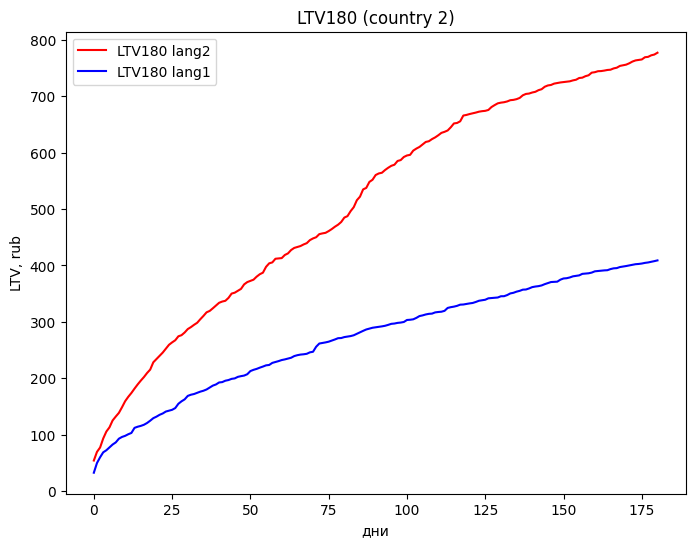

In [240]:
# Строим график
fig, ax=plt.subplots(figsize=(8,6))
ax.plot(pay_df_LTV2_summary['LTV180 lang2'], color='red', linestyle='-')
ax.set_xlabel('дни')
ax.set_ylabel('LTV, rub')
ax.plot(pay_df_LTV1_summary['LTV180 lang1'], color='blue')

plt.title('LTV180 (country 2)')
plt.legend(['LTV180 lang2', 'LTV180 lang1'])
# plt.grid(True)
plt.show()

In [241]:
logins.head()

,username,login_dt,login_ts,logout_ts
0,richarddavid,2022-06-22 00:00:00,2022-06-22 06:00:28,2022-06-22 06:04:33
1,richarddavid,2022-04-05 00:00:00,2022-04-05 19:12:24,2022-04-05 20:14:19
2,richarddavid,2022-04-05 00:00:00,2022-04-05 18:38:36,2022-04-05 18:43:15
3,richarddavid,2022-04-05 00:00:00,2022-04-05 04:27:37,2022-04-05 04:31:33
4,richarddavid,2022-06-14 00:00:00,2022-06-14 18:01:18,2022-06-14 19:37:17


In [242]:
logins.describe (include=['object'])

,username,login_dt,login_ts,logout_ts
count,1031797,1031149,1031149,1031149
unique,16367,459,936381,940859
top,zwilliams,2022-12-29 00:00:00,2022-12-03 16:52:43,2023-04-02 16:22:09
freq,3850,4636,8,11


In [243]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031797 entries, 0 to 1031796
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   username   1031797 non-null  object
 1   login_dt   1031149 non-null  object
 2   login_ts   1031149 non-null  object
 3   logout_ts  1031149 non-null  object
dtypes: object(4)
memory usage: 31.5+ MB


In [244]:
logins.isnull().sum()

username       0
login_dt     648
login_ts     648
logout_ts    648
dtype: int64

In [245]:
logins.duplicated().sum()

70289

In [246]:
logins1=logins.drop_duplicates().reset_index(drop=True)

In [247]:
logins1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961508 entries, 0 to 961507
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   username   961508 non-null  object
 1   login_dt   961001 non-null  object
 2   login_ts   961001 non-null  object
 3   logout_ts  961001 non-null  object
dtypes: object(4)
memory usage: 29.3+ MB


In [248]:
logins1.isnull().sum()

username       0
login_dt     507
login_ts     507
logout_ts    507
dtype: int64

In [249]:
logins1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961508 entries, 0 to 961507
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   username   961508 non-null  object
 1   login_dt   961001 non-null  object
 2   login_ts   961001 non-null  object
 3   logout_ts  961001 non-null  object
dtypes: object(4)
memory usage: 29.3+ MB


In [250]:
logins1.head(5)

,username,login_dt,login_ts,logout_ts
0,richarddavid,2022-06-22 00:00:00,2022-06-22 06:00:28,2022-06-22 06:04:33
1,richarddavid,2022-04-05 00:00:00,2022-04-05 19:12:24,2022-04-05 20:14:19
2,richarddavid,2022-04-05 00:00:00,2022-04-05 18:38:36,2022-04-05 18:43:15
3,richarddavid,2022-04-05 00:00:00,2022-04-05 04:27:37,2022-04-05 04:31:33
4,richarddavid,2022-06-14 00:00:00,2022-06-14 18:01:18,2022-06-14 19:37:17


In [251]:
logins1.describe (include=['object'])

,username,login_dt,login_ts,logout_ts
count,961508,961001,961001,961001
unique,16367,459,936381,940859
top,richardsondavid,2022-12-29 00:00:00,2022-05-15 15:33:48,2023-04-02 16:22:09
freq,2808,4347,6,11


In [252]:
logins1['login_dt'] = pd.to_datetime(logins1['login_dt'])

In [253]:
logins1['login_ts'] = pd.to_datetime(logins1['login_ts'])

In [254]:
logins1['logout_ts'] = pd.to_datetime(logins1['logout_ts'])

In [255]:
logins1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961508 entries, 0 to 961507
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   username   961508 non-null  object        
 1   login_dt   961001 non-null  datetime64[ns]
 2   login_ts   961001 non-null  datetime64[ns]
 3   logout_ts  961001 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(1)
memory usage: 29.3+ MB


In [256]:
logins1.sort_values(by='login_dt', inplace=True)

In [257]:
logins1

,username,login_dt,login_ts,logout_ts
76641,collinsalicia,2022-03-25,2022-03-25 12:59:34,2022-03-25 13:39:50
363767,colemanbrian,2022-03-25,2022-03-25 10:05:31,2022-03-25 10:58:08
283377,scallahan,2022-03-25,2022-03-25 08:35:49,2022-03-25 09:43:58
283378,scallahan,2022-03-25,2022-03-25 12:09:44,2022-03-25 15:18:15
283379,scallahan,2022-03-25,2022-03-25 18:40:52,2022-03-25 21:22:58
...,...,...,...,...
860684,paula32,NaT,NaT,NaT
861543,wiserhonda,NaT,NaT,NaT
861942,xpoole,NaT,NaT,NaT
862081,graynicole,NaT,NaT,NaT


In [258]:
login_df=pd.merge(logins1,app_installs, how='outer', on=['username'] )

In [259]:
login_df.describe (include=['object'])

,username,device_os,lang,country
count,961508,890843,890843,890843
unique,16367,24,2,3
top,richardsondavid,iPad; CPU iPad OS 5_1_1 like Mac OS X,lang1,country2
freq,2808,42493,526014,599644


In [260]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961508 entries, 0 to 961507
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   username     961508 non-null  object        
 1   login_dt     961001 non-null  datetime64[ns]
 2   login_ts     961001 non-null  datetime64[ns]
 3   logout_ts    961001 non-null  datetime64[ns]
 4   register_ts  890843 non-null  datetime64[ns]
 5   device_os    890843 non-null  object        
 6   lang         890843 non-null  object        
 7   country      890843 non-null  object        
 8   day_reg      890843 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(4)
memory usage: 73.4+ MB


In [261]:
login_df=login_df.dropna(subset=['country'])

In [262]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890843 entries, 0 to 961507
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   username     890843 non-null  object        
 1   login_dt     890380 non-null  datetime64[ns]
 2   login_ts     890380 non-null  datetime64[ns]
 3   logout_ts    890380 non-null  datetime64[ns]
 4   register_ts  890843 non-null  datetime64[ns]
 5   device_os    890843 non-null  object        
 6   lang         890843 non-null  object        
 7   country      890843 non-null  object        
 8   day_reg      890843 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(4)
memory usage: 68.0+ MB


In [263]:
login_df.describe (include=['object'])

,username,device_os,lang,country
count,890843,890843,890843,890843
unique,15777,24,2,3
top,richardsondavid,iPad; CPU iPad OS 5_1_1 like Mac OS X,lang1,country2
freq,2808,42493,526014,599644


In [264]:
counts=login_df['username'].value_counts()
counts.size

15777

In [265]:
login_df['login_dt']=login_df['login_dt'].where(login_df['login_dt'].notna(),login_df['day_reg'])

In [266]:
login_df

,username,login_dt,login_ts,logout_ts,register_ts,device_os,lang,country,day_reg
0,collinsalicia,2022-03-25,2022-03-25 12:59:34,2022-03-25 13:39:50,2022-03-25 12:58:58,iPhone; CPU iPhone OS 5_1_1 like Mac OS X,lang1,country2,2022-03-25
1,collinsalicia,2022-03-31,2022-03-31 20:43:06,2022-03-31 22:35:50,2022-03-25 12:58:58,iPhone; CPU iPhone OS 5_1_1 like Mac OS X,lang1,country2,2022-03-25
2,collinsalicia,2022-04-01,2022-04-01 13:20:42,2022-04-01 13:48:25,2022-03-25 12:58:58,iPhone; CPU iPhone OS 5_1_1 like Mac OS X,lang1,country2,2022-03-25
3,collinsalicia,2022-04-04,2022-04-04 18:31:53,2022-04-04 18:57:24,2022-03-25 12:58:58,iPhone; CPU iPhone OS 5_1_1 like Mac OS X,lang1,country2,2022-03-25
4,collinsalicia,2022-04-07,2022-04-07 14:50:09,2022-04-07 16:28:35,2022-03-25 12:58:58,iPhone; CPU iPhone OS 5_1_1 like Mac OS X,lang1,country2,2022-03-25
...,...,...,...,...,...,...,...,...,...
961503,paula32,2023-02-12,NaT,NaT,2023-02-12 18:47:36,iPad; CPU iPad OS 5_1_1 like Mac OS X,lang2,country2,2023-02-12
961504,wiserhonda,2022-04-27,NaT,NaT,2022-04-27 23:07:35,iPhone; CPU iPhone OS 5_1_1 like Mac OS X,lang1,country3,2022-04-27
961505,xpoole,2023-04-04,NaT,NaT,2023-04-04 22:05:20,iPhone; CPU iPhone OS 3_1_3 like Mac OS X,lang1,country3,2023-04-04
961506,graynicole,2022-12-18,NaT,NaT,2022-12-18 08:58:42,iPhone; CPU iPhone OS 3_1_3 like Mac OS X,lang2,country2,2022-12-18


In [267]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890843 entries, 0 to 961507
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   username     890843 non-null  object        
 1   login_dt     890843 non-null  datetime64[ns]
 2   login_ts     890380 non-null  datetime64[ns]
 3   logout_ts    890380 non-null  datetime64[ns]
 4   register_ts  890843 non-null  datetime64[ns]
 5   device_os    890843 non-null  object        
 6   lang         890843 non-null  object        
 7   country      890843 non-null  object        
 8   day_reg      890843 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(4)
memory usage: 68.0+ MB


In [268]:
login_df=login_df.drop(['login_ts', 'logout_ts','register_ts', 'device_os'], axis=1)

In [269]:
login_df.head()

,username,login_dt,lang,country,day_reg
0,collinsalicia,2022-03-25,lang1,country2,2022-03-25
1,collinsalicia,2022-03-31,lang1,country2,2022-03-25
2,collinsalicia,2022-04-01,lang1,country2,2022-03-25
3,collinsalicia,2022-04-04,lang1,country2,2022-03-25
4,collinsalicia,2022-04-07,lang1,country2,2022-03-25


In [270]:
login_df['diff_days']=(login_df['login_dt']-login_df['day_reg'])/np.timedelta64(1, 'D')
login_df

,username,login_dt,lang,country,day_reg,diff_days
0,collinsalicia,2022-03-25,lang1,country2,2022-03-25,0.0
1,collinsalicia,2022-03-31,lang1,country2,2022-03-25,6.0
2,collinsalicia,2022-04-01,lang1,country2,2022-03-25,7.0
3,collinsalicia,2022-04-04,lang1,country2,2022-03-25,10.0
4,collinsalicia,2022-04-07,lang1,country2,2022-03-25,13.0
...,...,...,...,...,...,...
961503,paula32,2023-02-12,lang2,country2,2023-02-12,0.0
961504,wiserhonda,2022-04-27,lang1,country3,2022-04-27,0.0
961505,xpoole,2023-04-04,lang1,country3,2023-04-04,0.0
961506,graynicole,2022-12-18,lang2,country2,2022-12-18,0.0


In [271]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890843 entries, 0 to 961507
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   username   890843 non-null  object        
 1   login_dt   890843 non-null  datetime64[ns]
 2   lang       890843 non-null  object        
 3   country    890843 non-null  object        
 4   day_reg    890843 non-null  datetime64[ns]
 5   diff_days  890843 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 47.6+ MB


In [272]:
counts=login_df['username'].value_counts()

In [273]:
counts.size

15777

In [274]:
login_df_30=login_df[(login_df['diff_days']<=30)&(login_df['country']=='country2')]

In [275]:
login_df_30

,username,login_dt,lang,country,day_reg,diff_days
0,collinsalicia,2022-03-25,lang1,country2,2022-03-25,0.0
1,collinsalicia,2022-03-31,lang1,country2,2022-03-25,6.0
2,collinsalicia,2022-04-01,lang1,country2,2022-03-25,7.0
3,collinsalicia,2022-04-04,lang1,country2,2022-03-25,10.0
4,collinsalicia,2022-04-07,lang1,country2,2022-03-25,13.0
...,...,...,...,...,...,...
961499,sarahbishop,2023-05-05,lang2,country2,2023-05-05,0.0
961501,angela71,2022-12-12,lang2,country2,2022-12-12,0.0
961502,leblancmalik,2022-09-05,lang2,country2,2022-09-05,0.0
961503,paula32,2023-02-12,lang2,country2,2023-02-12,0.0


In [276]:
login_df_R=login_df_30[(login_df_30['day_reg']<='2023-05-27')]

In [277]:
login_df_R

,username,login_dt,lang,country,day_reg,diff_days
0,collinsalicia,2022-03-25,lang1,country2,2022-03-25,0.0
1,collinsalicia,2022-03-31,lang1,country2,2022-03-25,6.0
2,collinsalicia,2022-04-01,lang1,country2,2022-03-25,7.0
3,collinsalicia,2022-04-04,lang1,country2,2022-03-25,10.0
4,collinsalicia,2022-04-07,lang1,country2,2022-03-25,13.0
...,...,...,...,...,...,...
961499,sarahbishop,2023-05-05,lang2,country2,2023-05-05,0.0
961501,angela71,2022-12-12,lang2,country2,2022-12-12,0.0
961502,leblancmalik,2022-09-05,lang2,country2,2022-09-05,0.0
961503,paula32,2023-02-12,lang2,country2,2023-02-12,0.0


In [278]:
login_df_R1=login_df_R[(login_df_R['lang']=='lang1')]

In [279]:
login_df_R1

,username,login_dt,lang,country,day_reg,diff_days
0,collinsalicia,2022-03-25,lang1,country2,2022-03-25,0.0
1,collinsalicia,2022-03-31,lang1,country2,2022-03-25,6.0
2,collinsalicia,2022-04-01,lang1,country2,2022-03-25,7.0
3,collinsalicia,2022-04-04,lang1,country2,2022-03-25,10.0
4,collinsalicia,2022-04-07,lang1,country2,2022-03-25,13.0
...,...,...,...,...,...,...
961343,chase91,2022-06-27,lang1,country2,2022-06-27,0.0
961425,katie39,2022-04-29,lang1,country2,2022-04-29,0.0
961447,shari95,2022-06-18,lang1,country2,2022-06-18,0.0
961472,vballard,2022-08-12,lang1,country2,2022-08-12,0.0


In [280]:
login_df_R1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64427 entries, 0 to 961474
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   username   64427 non-null  object        
 1   login_dt   64427 non-null  datetime64[ns]
 2   lang       64427 non-null  object        
 3   country    64427 non-null  object        
 4   day_reg    64427 non-null  datetime64[ns]
 5   diff_days  64427 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 3.4+ MB


In [281]:
login_df_R2=login_df_R[(login_df_R['lang']=='lang2')]

In [282]:
login_df_R2

,username,login_dt,lang,country,day_reg,diff_days
401862,wandaprice,2022-08-14,lang2,country2,2022-08-14,0.0
401864,michelleclark,2022-08-14,lang2,country2,2022-08-14,0.0
401865,michelleclark,2022-08-14,lang2,country2,2022-08-14,0.0
401866,michelleclark,2022-08-14,lang2,country2,2022-08-14,0.0
401867,michelleclark,2022-08-15,lang2,country2,2022-08-14,1.0
...,...,...,...,...,...,...
961499,sarahbishop,2023-05-05,lang2,country2,2023-05-05,0.0
961501,angela71,2022-12-12,lang2,country2,2022-12-12,0.0
961502,leblancmalik,2022-09-05,lang2,country2,2022-09-05,0.0
961503,paula32,2023-02-12,lang2,country2,2023-02-12,0.0


In [283]:
login_df_R1.duplicated().sum()

42152

In [284]:
login_df_R2.duplicated().sum()

94838

In [285]:
login_df_R1=login_df_R1.drop_duplicates().reset_index(drop=True)

In [286]:
login_df_R2=login_df_R2.drop_duplicates().reset_index(drop=True)

In [287]:
login_df_R1

,username,login_dt,lang,country,day_reg,diff_days
0,collinsalicia,2022-03-25,lang1,country2,2022-03-25,0.0
1,collinsalicia,2022-03-31,lang1,country2,2022-03-25,6.0
2,collinsalicia,2022-04-01,lang1,country2,2022-03-25,7.0
3,collinsalicia,2022-04-04,lang1,country2,2022-03-25,10.0
4,collinsalicia,2022-04-07,lang1,country2,2022-03-25,13.0
...,...,...,...,...,...,...
22270,chase91,2022-06-27,lang1,country2,2022-06-27,0.0
22271,katie39,2022-04-29,lang1,country2,2022-04-29,0.0
22272,shari95,2022-06-18,lang1,country2,2022-06-18,0.0
22273,vballard,2022-08-12,lang1,country2,2022-08-12,0.0


In [288]:
login_df_R2

,username,login_dt,lang,country,day_reg,diff_days
0,wandaprice,2022-08-14,lang2,country2,2022-08-14,0.0
1,michelleclark,2022-08-14,lang2,country2,2022-08-14,0.0
2,michelleclark,2022-08-15,lang2,country2,2022-08-14,1.0
3,michelleclark,2022-08-16,lang2,country2,2022-08-14,2.0
4,michelleclark,2022-08-17,lang2,country2,2022-08-14,3.0
...,...,...,...,...,...,...
43583,sarahbishop,2023-05-05,lang2,country2,2023-05-05,0.0
43584,angela71,2022-12-12,lang2,country2,2022-12-12,0.0
43585,leblancmalik,2022-09-05,lang2,country2,2022-09-05,0.0
43586,paula32,2023-02-12,lang2,country2,2023-02-12,0.0


In [289]:
login_df_R1=login_df_R1.drop(['login_dt', 'country', 'lang',  'day_reg'], axis=1)

In [290]:
login_df_R2=login_df_R2.drop(['login_dt', 'country', 'lang',  'day_reg'], axis=1)

In [291]:
login_df_R1_summary=login_df_R1.groupby(['diff_days']).count()
login_df_R1_summary

,username
diff_days,
0.0,3091
1.0,1678
2.0,1299
3.0,1085
4.0,962
5.0,864
6.0,839
7.0,786
8.0,726


In [292]:
login_df_R2_summary=login_df_R2.groupby(['diff_days']).count()
login_df_R2_summary

,username
diff_days,
0.0,5491
1.0,4112
2.0,2557
3.0,2106
4.0,1831
5.0,1678
6.0,1573
7.0,1491
8.0,1394


In [293]:
login_df_R1_summary.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 31 entries, 0.0 to 30.0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   username  31 non-null     int64
dtypes: int64(1)
memory usage: 496.0 bytes


In [294]:
login_df_R1_summary['username']=login_df_R1_summary['username'].where(login_df_R1_summary.index!=0,3403)
login_df_R1_summary

,username
diff_days,
0.0,3403
1.0,1678
2.0,1299
3.0,1085
4.0,962
5.0,864
6.0,839
7.0,786
8.0,726


In [295]:
login_df_R2_summary.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 31 entries, 0.0 to 30.0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   username  31 non-null     int64
dtypes: int64(1)
memory usage: 496.0 bytes


In [296]:
login_df_R2_summary['username']=login_df_R2_summary['username'].where(login_df_R2_summary.index!=0,5946)
login_df_R2_summary

,username
diff_days,
0.0,5946
1.0,4112
2.0,2557
3.0,2106
4.0,1831
5.0,1678
6.0,1573
7.0,1491
8.0,1394


In [297]:
login_df_R1_summary['Retention_rate_lang1']=login_df_R1_summary['username']/3403

In [298]:
login_df_R1_summary

,username,Retention_rate_lang1
diff_days,,
0.0,3403,1.000000
1.0,1678,0.493094
2.0,1299,0.381722
3.0,1085,0.318836
4.0,962,0.282692
5.0,864,0.253894
6.0,839,0.246547
7.0,786,0.230973
8.0,726,0.213341


In [299]:
login_df_R2_summary['Retention_rate_lang2']=login_df_R2_summary['username']/5946

In [300]:
login_df_R2_summary

,username,Retention_rate_lang2
diff_days,,
0.0,5946,1.000000
1.0,4112,0.691557
2.0,2557,0.430037
3.0,2106,0.354188
4.0,1831,0.307938
5.0,1678,0.282207
6.0,1573,0.264548
7.0,1491,0.250757
8.0,1394,0.234443


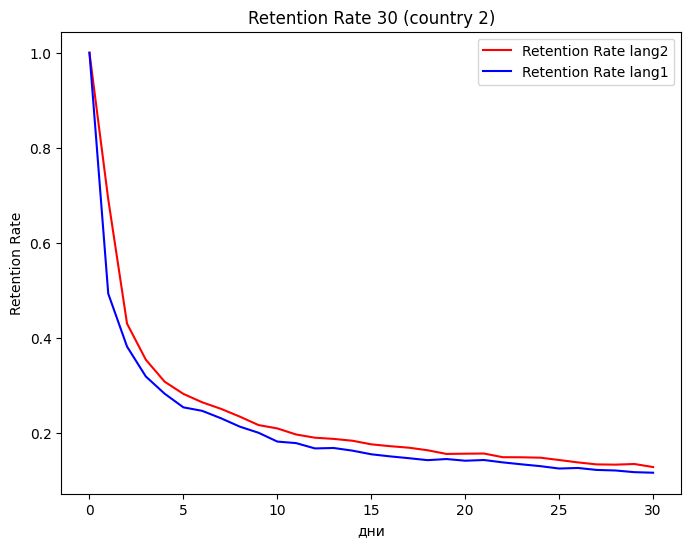

In [301]:
# Строим график
fig, ax=plt.subplots (figsize=(8,6))
ax.plot(login_df_R2_summary['Retention_rate_lang2'], color='red', linestyle='-')
ax.set_xlabel('дни')
ax.set_ylabel('Retention Rate')
ax.plot(login_df_R1_summary['Retention_rate_lang1'], color='blue')

plt.title('Retention Rate 30 (country 2)')
plt.legend(['Retention Rate lang2', 'Retention Rate lang1'])
# plt.grid(True)
plt.show()


In [302]:
S_R1=round(login_df_R1_summary['Retention_rate_lang1'].sum(),2)
S_R1

6.64

In [303]:
S_R2=round(login_df_R2_summary['Retention_rate_lang2'].sum(),2)
S_R2

7.41

Дополни

In [304]:
pay_df_1802.head(3)

,username,pay_dt,amount,lang,country,day_reg,diff_days
0,chavezkatrina,2022-03-26,169.914489,lang1,country2,2022-03-25,1.0
1,nwarren,2022-03-26,8329.320757,lang1,country2,2022-03-26,0.0
2,richarddavid,2022-03-26,168.106481,lang1,country2,2022-03-26,0.0


In [305]:

# Вычисление средних значений столбца "converted_amt" для каждой группы
mean_group1 = pay_df_LTV1_summary['amount'].mean()
mean_group2 = pay_df_LTV2_summary['amount'].mean()


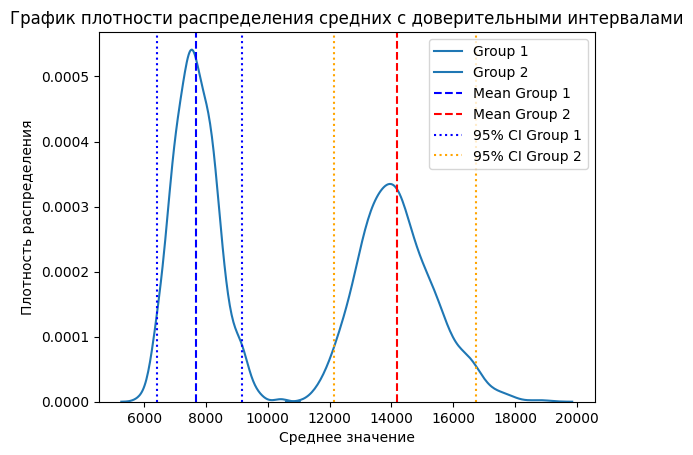

In [306]:

# Создание списка для хранения выборочных средних
res1 = []
res2 = []

# Повторение процесса bootstrap
for _ in range(500, 1001):
    # Создание нового датасета из случайных элементов
    ddf1 = pay_df_LTV1_summary.sample(frac=1, replace=True)
    ddf2 = pay_df_LTV2_summary.sample(frac=1, replace=True)

    # Вычисление средних значений столбца "converted_amt" для каждой группы
    mean1 = ddf1['amount'].mean()
    mean2 = ddf2['amount'].mean()
    res1.append(mean1)
    res2.append(mean2)

# Преобразование списков res1 и res2 в DataFrame
bootstrap_df1 = pd.DataFrame(res1)
bootstrap_df2 = pd.DataFrame(res2)

# Вычисление доверительных интервалов
ci1 = np.percentile(bootstrap_df1, [2.5, 97.5])
ci2 = np.percentile(bootstrap_df2, [2.5, 97.5])

# Построение графика плотности распределения средних
sns.kdeplot(data=bootstrap_df1, label='Group 1')
sns.kdeplot(data=bootstrap_df2, label='Group 2')

# Отображение средних значений
plt.axvline(mean_group1, color='blue', linestyle='--', label='Mean Group 1')
plt.axvline(mean_group2, color='red', linestyle='--', label='Mean Group 2')

# Отображение доверительных интервалов
plt.axvline(ci1[0], color='blue', linestyle=':', label='95% CI Group 1')
plt.axvline(ci1[1], color='blue', linestyle=':', label='')
plt.axvline(ci2[0], color='orange', linestyle=':', label='95% CI Group 2')
plt.axvline(ci2[1], color='orange', linestyle=':', label='')

plt.xlabel('Среднее значение')
plt.ylabel('Плотность распределения')
plt.title('График плотности распределения средних с доверительными интервалами')
plt.legend()
plt.show()

# Вычисление среднего и медианного значения уровней для каждой группы
mean_group1 = pay_df_LTV1_summary['amount'].mean()
median_group1 = pay_df_LTV1_summary['amount'].median()

mean_group2 = pay_df_LTV2_summary['amount'].mean()
median_group2 = pay_df_LTV2_summary['amount'].median()
